# Reducing to Magnetisation

We now retuce our problem to a a random walk with probabilities that depend on the position on the interval $m \in [-1,1]$. To implement it i will try two methods:
 - First of all, I will allow a pseudo-continuous magnetisation, that is, the magnetisation steps will be $2/N$ but due to numerical errors during the evolution the magnetisation will take more than $N$ unique values.
 - In counterpart, I will implement a second method where I will keep track of the magnetisation using an integer from $1$ to $N$ and using this value to calculate the transition probabilities

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import math

## First Method

In [ ]:
@njit
def mag_evo_1(N, t, r):
    m = 0
    for _ in range(t):
        for _ in range (N):
            if np.random.rand() < r/N:
                m = 0
            elif np.random.rand() < 1/2*(1-m**2):
                m = m + (2 * np.random.randint(0, 2) - 1)*2/N
    return(m)
    

In [ ]:
@njit
def dist1(N, t, r, samples):
    res = np.zeros(samples)

    for i in range(samples):
        res[i] = mag_evo_1(N,t,r)
    
    return res

(array([ 972.,  173.,  204.,  273.,  249.,  325.,  352.,  425.,  431.,
         485.,  579.,  594.,  678.,  680.,  828., 1000., 1106., 1272.,
        1394., 1576., 1715., 1963., 2225., 2502., 2951., 2935., 2485.,
        2168., 2042., 1794., 1568., 1358., 1186., 1131.,  977.,  874.,
         781.,  700.,  622.,  566.,  479.,  432.,  372.,  320.,  305.,
         312.,  272.,  237.,  189.,  943.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <BarContainer object of 50 artists>)

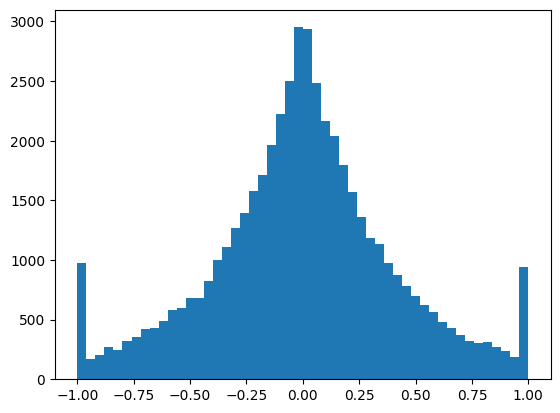

In [5]:
plt.hist(dist1(1000, 1000, 0.01, 50000), bins = 50)

# Compare

In [ ]:
import sys
from importlib import reload
sys.path.append("../scripts")
import solution as sol

sol = reload(sol)

In [ ]:
d = dist1(1000, 1000, 0.01, 10000)

In [ ]:
bins = 50
plt.hist(d, bins = bins, density=True)
# plt.hist(d2, bins = bins, density=True)
plt.scatter(np.linspace(-1,1,bins), np.array(sol.sol(1000,0.01,0,bins))/2, color = "r")

# Second Method

In [9]:
@njit
def mag_evo_2(N, t, r):
    s = math.ceil(N/2)
    for _ in range(t):
        for _ in range (N):
            m = (2/N)*s-1
            if np.random.rand() < r/N:
                s = 0
            elif np.random.rand() < 1/2*(1-m**2):
                s = s + (2 * np.random.randint(0, 2) - 1)
    return(2/N*s-1)
    

In [10]:
@njit
def dist2(N, t, r, samples):
    res = np.zeros(samples)

    for i in range(samples):
        res[i] = mag_evo_2(N,t,r)
    
    return res

(array([4.9999e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.     , -0.98924, -0.97848, -0.96772, -0.95696, -0.9462 ,
        -0.93544, -0.92468, -0.91392, -0.90316, -0.8924 , -0.88164,
        -0.87088, -0.86012, -0.84936, -0.8386 , -0.82784, -0.81708,
        -0.80632, -0.79556, -0.7848 , -0.77404, -0.76328, -0.75252,
        -0.74176, -0.731  , -0.72024, -0.70948

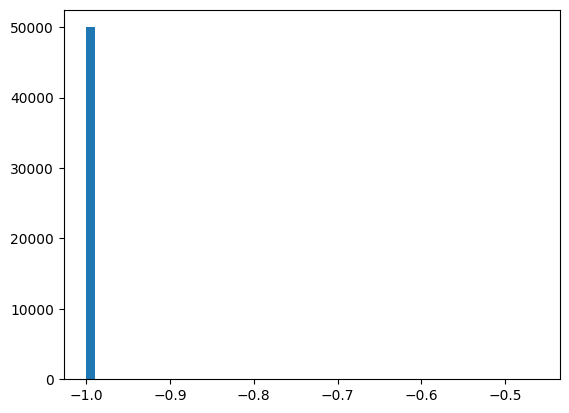

In [11]:
plt.hist(dist2(1000, 1000, 0.01, 50000), bins = 50)